In [1]:
%load_ext autoreload

In [2]:
import torch
import os
import random
import onnx
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms
from tqdm.auto import tqdm
import wandb

from models.pilotnet import PilotNet
from data_prep.nvidia import NvidiaDataset

/gpfs/space/home/raineich/rally/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
dataset_path = Path('/gpfs/space/projects/rally2023/rally-estonia-cropped-antialias')
random.seed(42)
data_dirs = os.listdir(dataset_path)
random.shuffle(data_dirs)

train_paths = [dataset_path / dir_name for dir_name in data_dirs[:1]]

BATCH_SIZE=16


train_dataset = NvidiaDataset(train_paths, transform=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,
                                                   num_workers=2, pin_memory=True,
                                                   persistent_workers=True, collate_fn=train_dataset.collate_fn)

[NvidiaDataset] Using default transform: Compose(
)
/gpfs/space/projects/rally2023/rally-estonia-cropped-antialias/2021-10-14-13-08-51_e2e_rec_vahi_backwards: length=13442, filtered=0


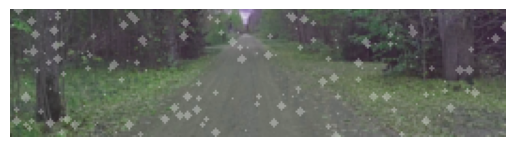

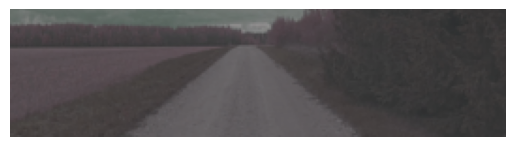

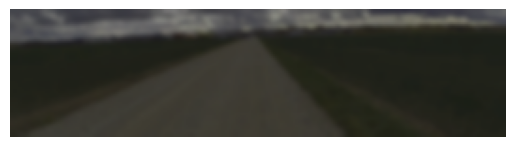

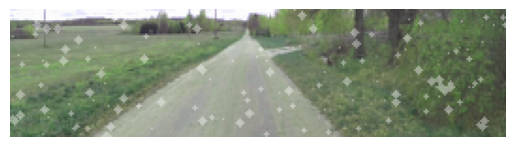

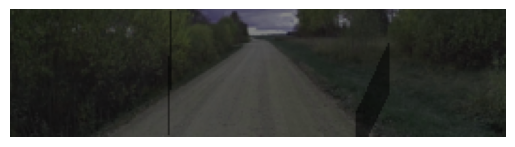

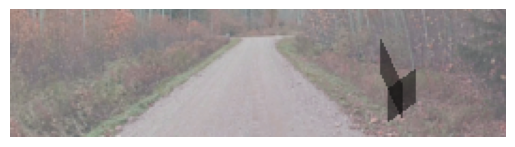

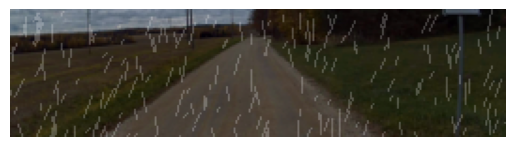

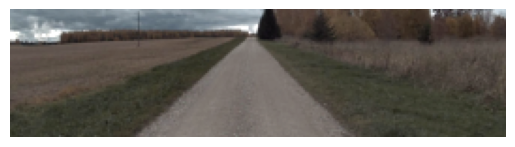

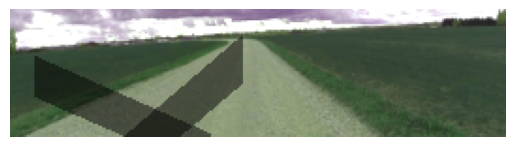

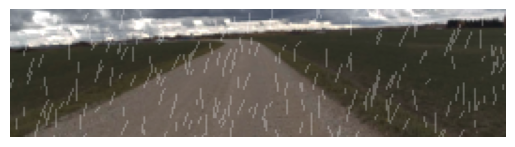

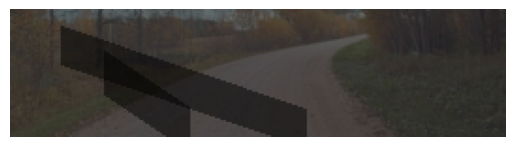

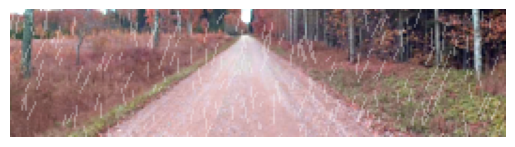

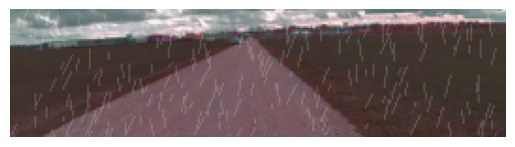

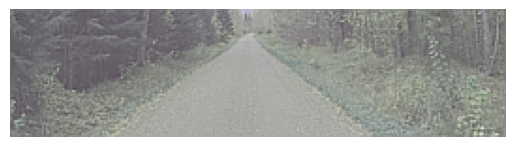

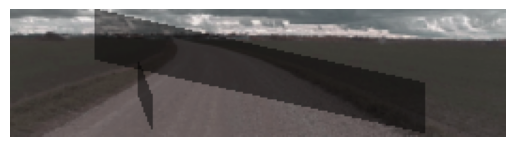

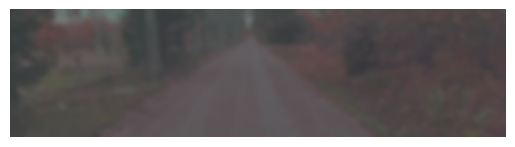

In [7]:
images = next(iter(train_loader))[0]['image']

for i in range(16):
    plt.imshow(images[i].permute(1,2,0))
    plt.axis('off')
    plt.show()